In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()

In [7]:
sizes = [8, 16, 32, 64, 128, 256, 512, 1024]
types = {
    #"AVL": "AVL tree",
    "BF": "Brute force",
    "BLOCK": "√ blocks",
    "BMS": "Blocked Mergesort",
    #"BV-BT": "B-tree backed BV",
    #"BV-ST": "Segment tree backed BV",
    #"RB": "Red-black tree",
    "MS": "Mergesort"
}

In [8]:
d = {}
for t, name in types.items():
    stats = []
    for s in sizes:
        with open(f"res/{t}_{s}.txt") as in_file:
            l = []
            for lin in in_file:
                if "Mean" not in lin:
                    l.append(float(lin) / s)
            stats.append((np.median(l), np.abs(np.quantile(l, [0.75, 0.25]) - np.median(l))))
    d[t] = stats

In [11]:
d["BF"]

[(18.375, array([1.625, 1.5  ])),
 (22.3125, array([0.9375, 0.875 ])),
 (32.53125, array([2.1875, 1.625 ])),
 (37.765625, array([11.0625  ,  2.296875])),
 (43.421875, array([1.859375 , 1.2421875])),
 (60.3515625, array([1.34765625, 1.0703125 ])),
 (88.408203125, array([2.890625, 1.5     ])),
 (126.1181640625, array([0.75683594, 0.66601562]))]

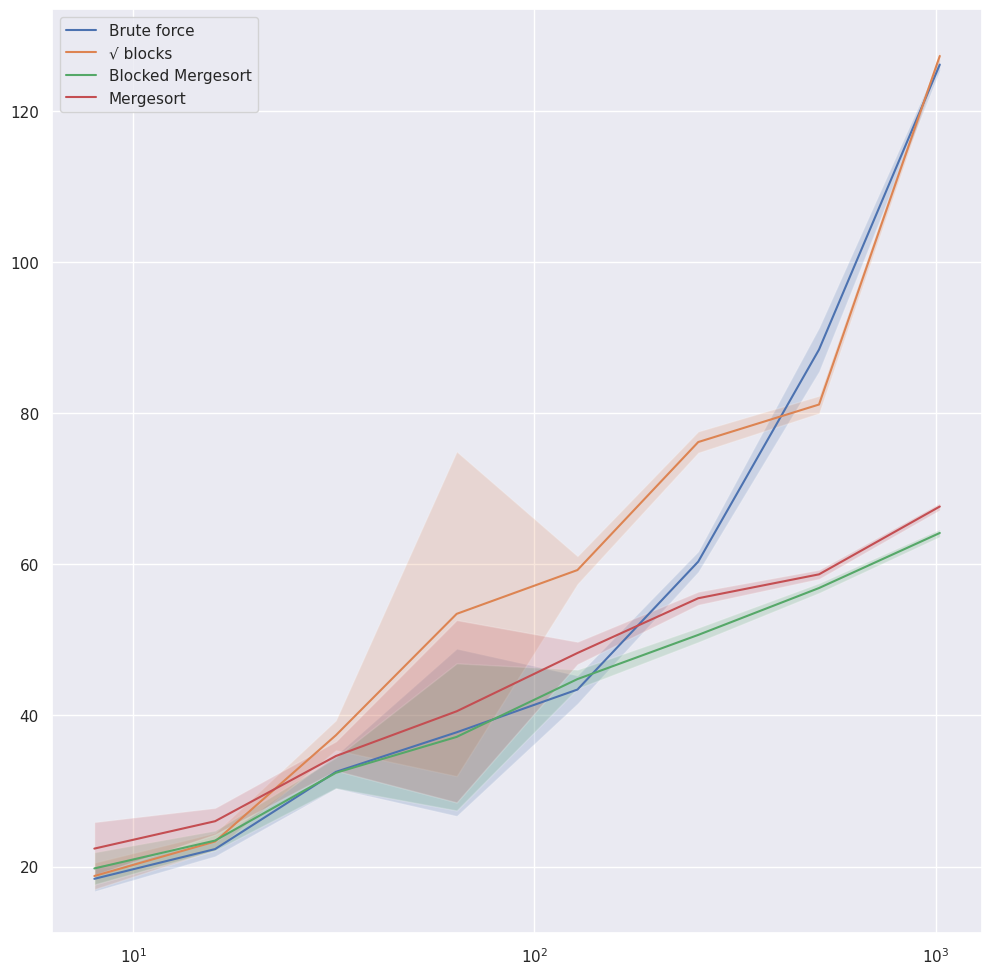

In [14]:
plt.figure(figsize=(12, 12))
for t, name in types.items():
    plt.plot(sizes, [e[0] for e in d[t]], label=name)
    plt.fill_between(sizes, [e[0] + e[1][0] for e in d[t]], [e[0] - e[1][0] for e in d[t]], alpha=0.2)
plt.xticks(sizes)
plt.legend()
plt.xscale("log")
plt.show()

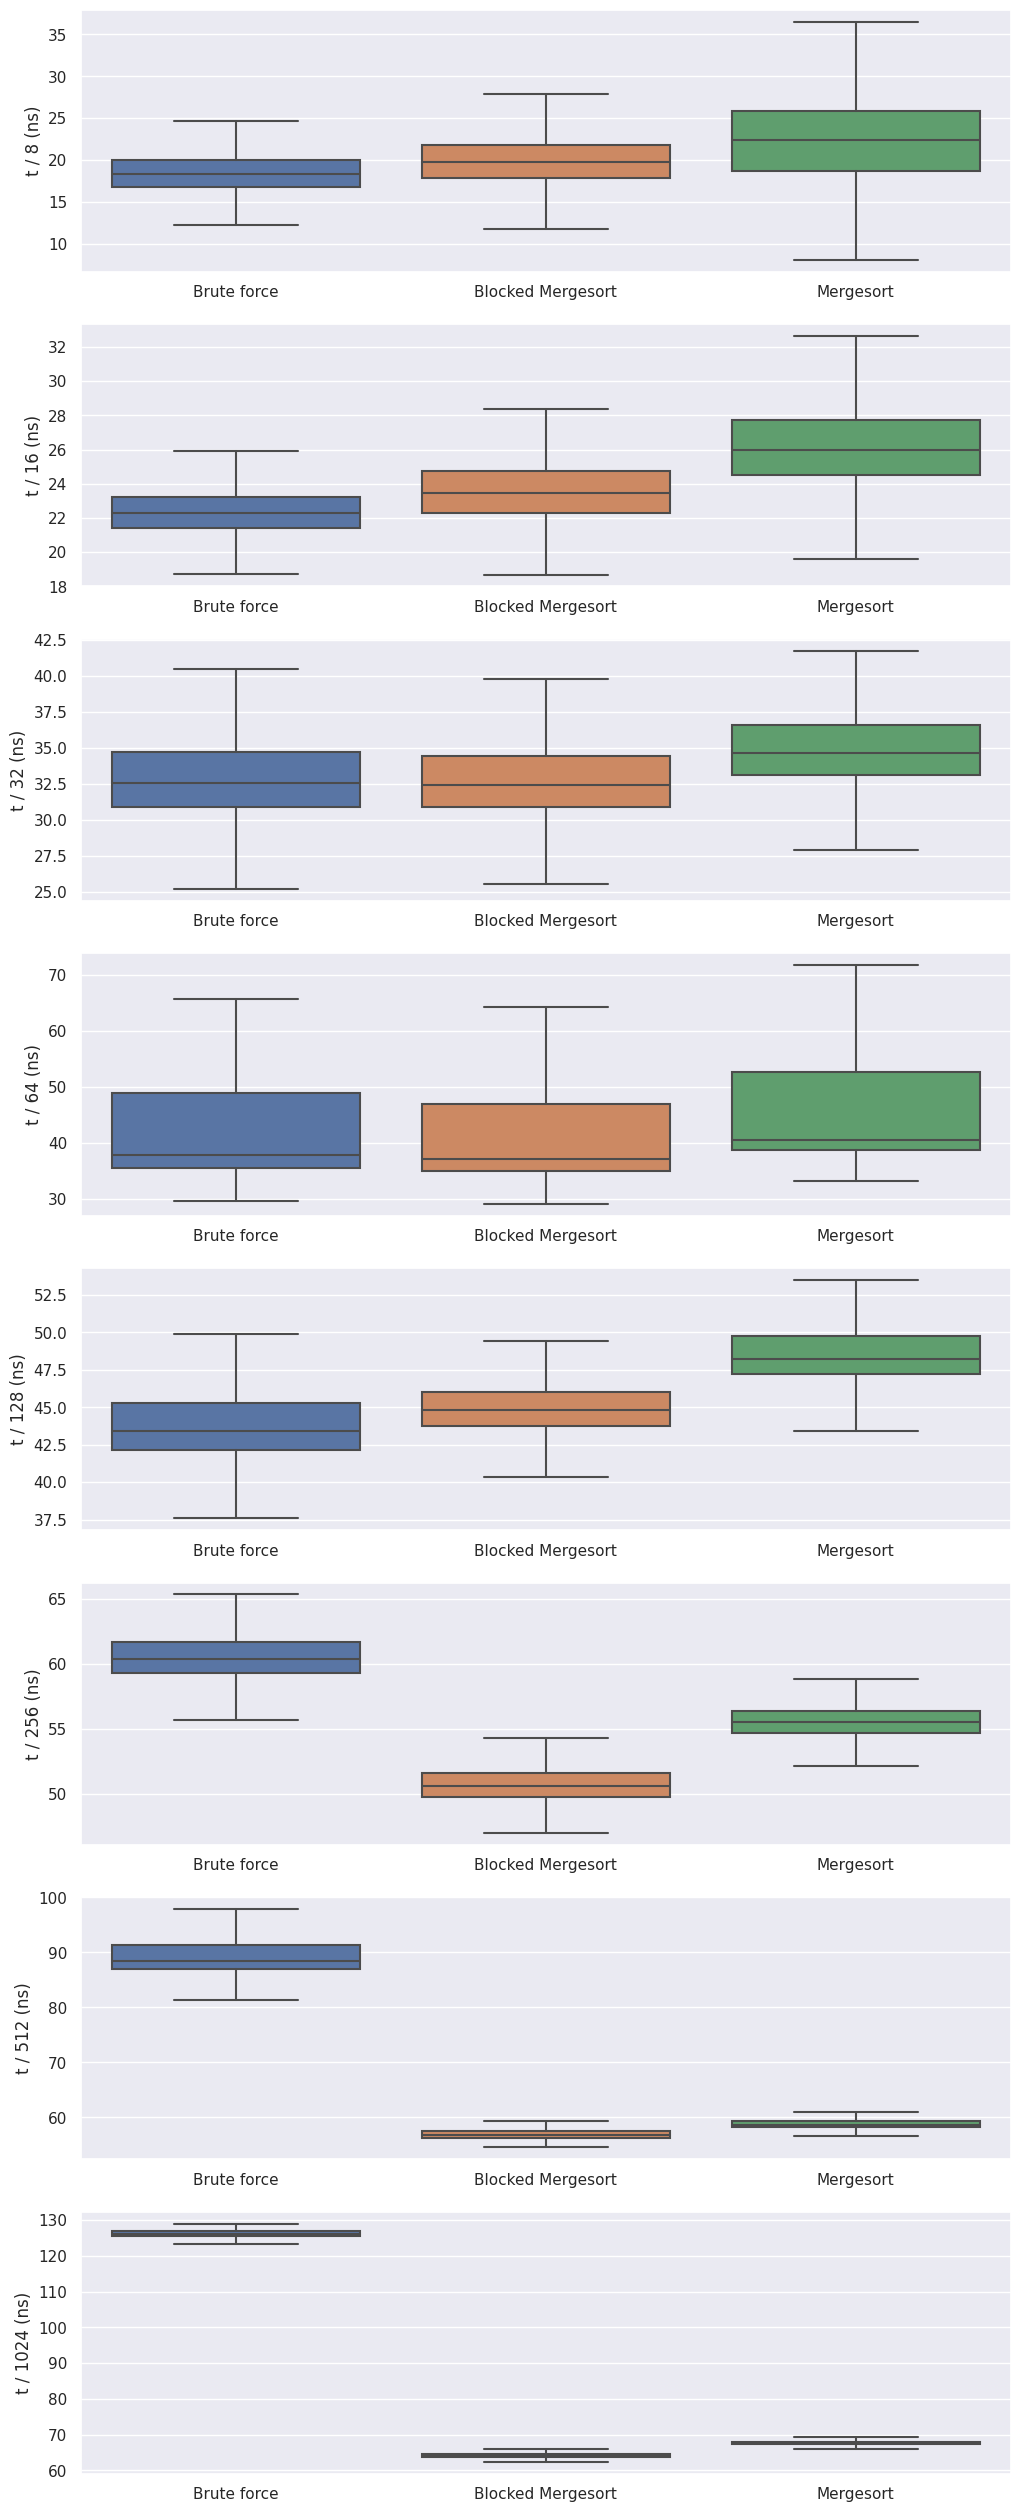

In [10]:
box_types = ["BF", "BMS", "MS"]
plt.figure(figsize=(12, 4 * len(sizes)))
for i, s in enumerate(sizes):
    plt.subplot(len(sizes), 1, i + 1)
    stats = []
    for t in box_types:
        name = types[t]
        with open(f"res/{t}_{s}.txt") as in_file:
            l = []
            for lin in in_file:
                if "Mean" not in lin:
                    l.append(float(lin) / s)
            stats.append(l)
    df = pd.DataFrame({types[t]: v for t, v in zip(box_types, stats)})
    sns.boxplot(data=df, showfliers=False)
    plt.ylabel(f"t / {s} (ns)")
plt.savefig("boxes.svg")
plt.show()